In [1]:
pip install numpy opencv-python tensorflow matplotlib seaborn scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\amedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.5511 - loss: 1.3345 - val_accuracy: 0.8780 - val_loss: 0.5830
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.7245 - loss: 0.5471 - val_accuracy: 0.6829 - val_loss: 0.5770
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.7809 - loss: 0.5363 - val_accuracy: 0.8780 - val_loss: 0.5407
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.7979 - loss: 0.4917 - val_accuracy: 0.8537 - val_loss: 0.4514
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.7929 - loss: 0.4514 - val_accuracy: 0.8537 - val_loss: 0.4055
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.8269 - loss: 0.4330 - val_accuracy: 0.9024 - val_loss: 0.3931
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.8410 - loss: 0.3551 - val_accuracy: 0.8780 - val_loss: 0.3450
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8807 - loss: 0.3171 - val_accuracy: 0.9024 - val_loss:

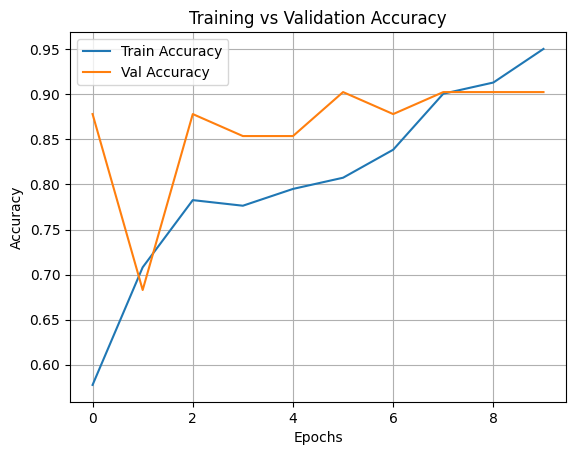

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


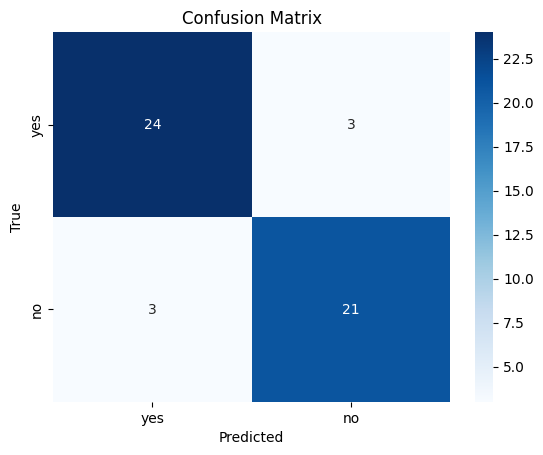


Classification Report:
              precision    recall  f1-score   support

         yes       0.89      0.89      0.89        27
          no       0.88      0.88      0.88        24

    accuracy                           0.88        51
   macro avg       0.88      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



In [3]:
# Brain MRI Tumor Classification using CNN


# Step 1: Import Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 2: Load and Preprocess Data
data_dir = 'C:/Users/amedi/Downloads/Projects/brain_tumor_dataset/brain_tumor_dataset' 
categories = ['yes', 'no']
img_size = 128

data = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    class_label = categories.index(category)

    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            data.append([img, class_label])
        except:
            pass  

# Step 3: Split Features and Labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0  
y = np.array(y)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# Step 6: Compile Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train Model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Step 8: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Step 9: Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=categories))
